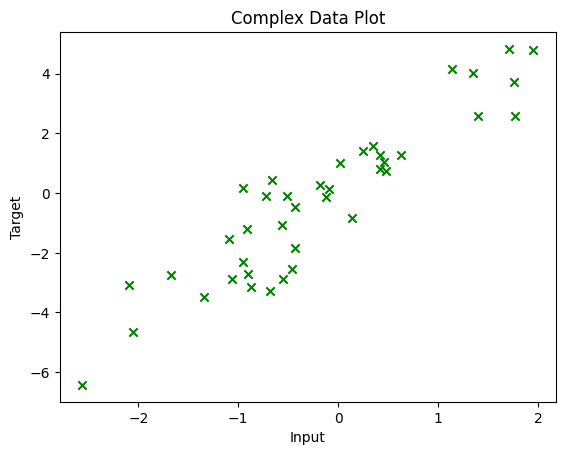

In [ ]:
# Import libraries
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from IPython import display
# display.set_matplotlib_formats('svg')


# Create new complex data
N = 40
x_complex = torch.randn(N, 1)
y_complex = 2 * x_complex + torch.randn(N, 1)



# Plot the new data
plt.scatter(x_complex, y_complex, marker='x', color='green')
plt.xlabel('Input')
plt.ylabel('Target')
plt.title('Complex Data Plot')
plt.show()


In [ ]:
# Build a new neural network model
complex_model = nn.Sequential(
    nn.Linear(1, 1)
)

complex_model


Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# Set a new learning rate
learningRate_complex = 0.1

# Define a new loss function
lossfun_complex = nn.MSELoss()

# Create a new optimizer
# optimizer_complex = torch.optim.Adam(complex_model.parameters(), lr=learningRate_complex)
optimizer_complex = torch.optim.SGD(complex_model.parameters(), lr=learningRate_complex)


In [ ]:
# Train the complex model
numepochs_complex = 4000
losses_complex = []

for epoch_complex in range(numepochs_complex):
    # Forward pass
    yHat_complex = complex_model(x_complex)

    # Compute loss
    loss_complex = lossfun_complex(yHat_complex, y_complex)
    losses_complex.append(loss_complex.item())

    # Backpropagation
    optimizer_complex.zero_grad()
    loss_complex.backward()
    optimizer_complex.step()
print(f"Epoch {epoch_complex+1}/{numepochs_complex} - Loss: {loss_complex.item()}")

Epoch 4000/4000 - Loss: 0.999538242816925


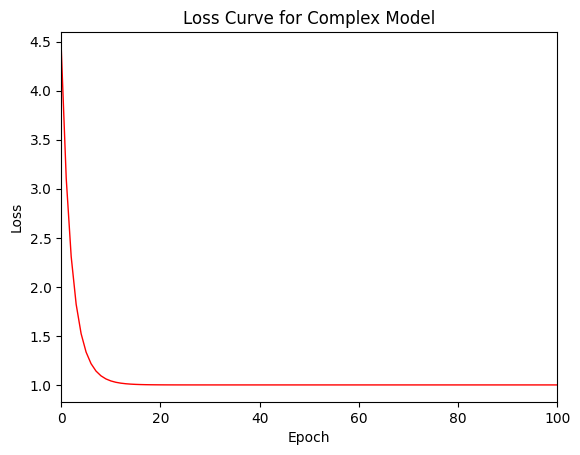

In [ ]:
# Show the loss curve
plt.plot(losses_complex, 'r-', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve for Complex Model')
plt.xlim(0,100)
# plt.ylim(0.9,1)
plt.show()


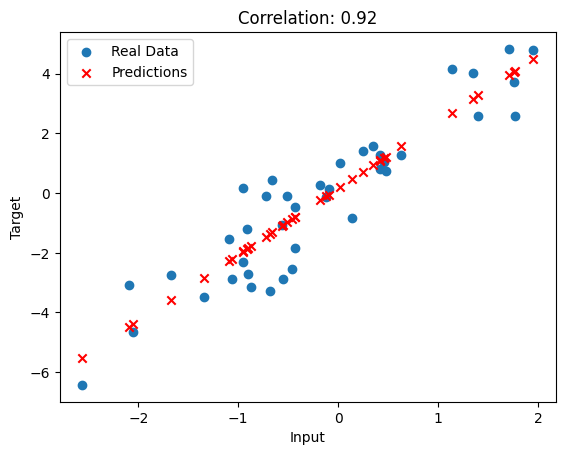

In [ ]:
# Plot the new data and predictions
predictions_complex = complex_model(x_complex)

plt.scatter(x_complex, y_complex, marker='o', label='Real Data')
plt.scatter(x_complex, predictions_complex.detach(), marker='x', color='red', label='Predictions')
plt.xlabel('Input')
plt.ylabel('Target')
plt.title(f'Correlation: {np.corrcoef(y_complex.T, predictions_complex.detach().T)[0, 1]:.2f}')
plt.legend()
plt.show()


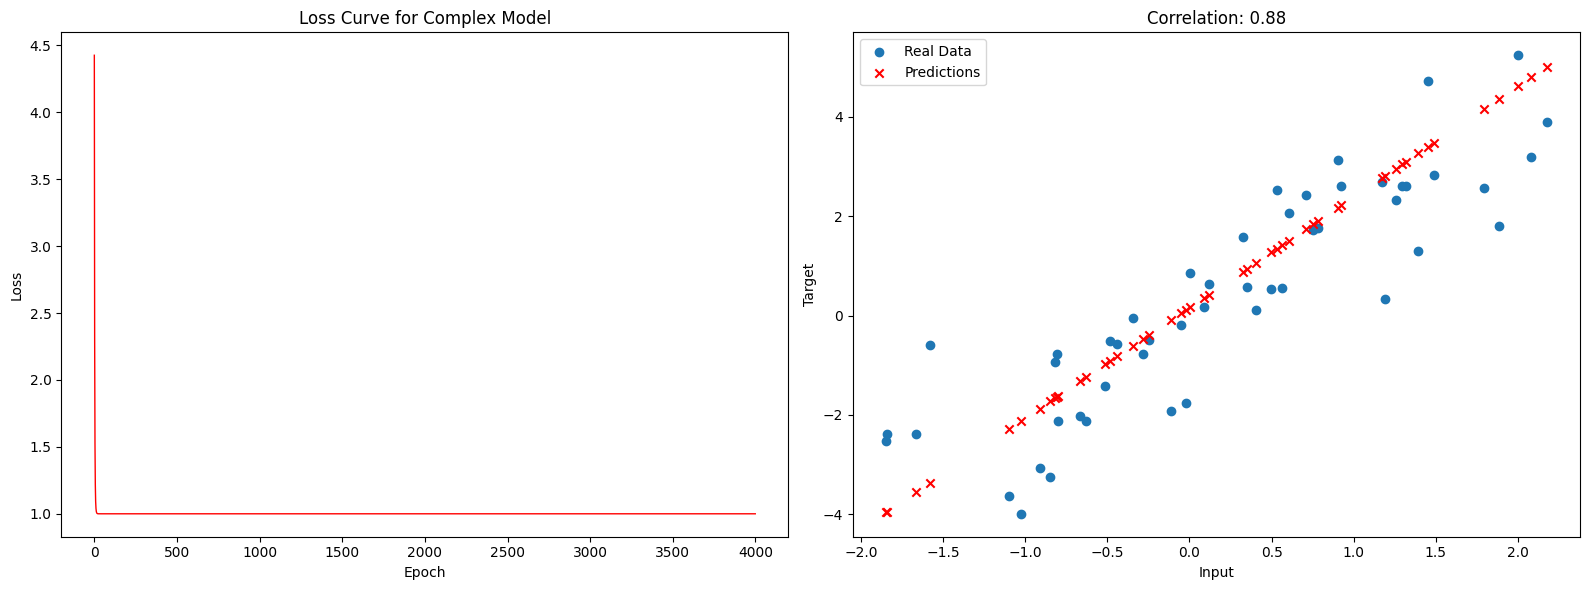

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# First subplot for the loss curve
axs[0].plot(losses_complex, 'r-', linewidth=1)
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].set_title('Loss Curve for Complex Model')
# axs[0].set_xlim(0, 1000)
# axs[0].set_ylim(0.9, 1)  # Uncomment if you want to set the y-limit

# Second subplot for real data and predictions
predictions_complex = complex_model(x_complex)
axs[1].scatter(x_complex, y_complex, marker='o', label='Real Data')
axs[1].scatter(x_complex, predictions_complex.detach(), marker='x', color='red', label='Predictions')
axs[1].set_xlabel('Input')
axs[1].set_ylabel('Target')
axs[1].set_title(f'Correlation: {np.corrcoef(y_complex.T, predictions_complex.detach().T)[0, 1]:.2f}')
axs[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

Slope (beta1): 1.857926845550537
Intercept (beta0): -0.013624340295791626


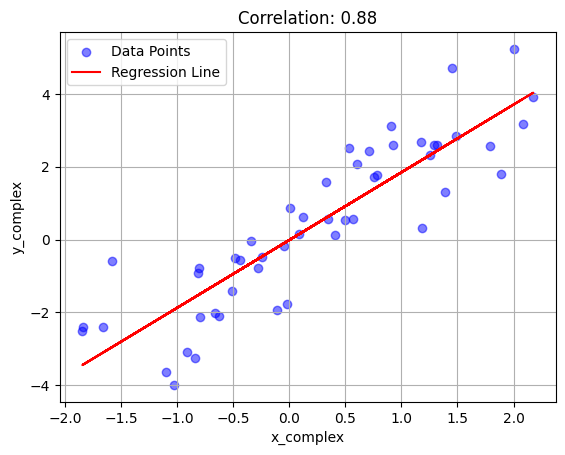

In [ ]:
import torch
import matplotlib.pyplot as plt

# Generate data
N = 50
x_complex = torch.randn(N, 1)
y_complex = 2 * x_complex + torch.randn(N, 1)

# Compute the means
x_mean = torch.mean(x_complex)
y_mean = torch.mean(y_complex)

# Compute the slope (beta1)
numerator = torch.sum((x_complex - x_mean) * (y_complex - y_mean))
denominator = torch.sum((x_complex - x_mean) ** 2)
beta1 = numerator / denominator

# Compute the intercept (beta0)
beta0 = y_mean - beta1 * x_mean

# Display the coefficients
print(f"Slope (beta1): {beta1.item()}")
print(f"Intercept (beta0): {beta0.item()}")

# Generate predictions using the coefficients
y_pred = beta0 + beta1 * x_complex

# Plot the original data points
plt.scatter(x_complex.numpy(), y_complex.numpy(), label='Data Points', color='blue', alpha=0.5)

# Plot the regression line
plt.plot(x_complex.numpy(), y_pred.numpy(), label='Regression Line', color='red')

# Add labels and legend
plt.xlabel('x_complex')
plt.ylabel('y_complex')
plt.title('Linear Regression: Predicted vs Actual Data')
plt.legend()
plt.grid()
plt.title(f'Correlation: {np.corrcoef(y_complex.T, x_complex.detach().T)[0, 1]:.2f}')
# Show the plot
plt.show()
